1. Загрузить датасет в Python.
2. Описать набор данных и решаемую задачу.
3. Выделить целевую переменную и факторные переменные.
4. Удалить ненужные данные, проанализировать отсутствующие значения.
5. Прокомментировать количественные параметры датасета.
6. Разбить выборку на обучающую и тестовую.
7. Работа по вариантам.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [42]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
print('Количество строк: ', data.shape[0], '\nКоличество столбцов: ', data.shape[1])
print('\nТипы переменных:\n', data.dtypes)
print('\nКоличество значений:\n', data.value_counts)
print('\nКоличество отсутствующих значений для каждого поля:\n', data.isna().sum())
print('\nКоличество уникальных полей для каждого столбца:\n', data.nunique())
print('\nКатегориальные признаки: ', data.select_dtypes(include='object').columns.tolist())
print('\nЧисловые признаки: ', data.select_dtypes(include='number').columns.tolist())
print('\nОписание числовых признаков:\n', data.describe())

Количество строк:  8124 
Количество столбцов:  23

Типы переменных:
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Количество значений:
 <bound method DataFrame.value_counts of      class cap-shape cap-surface cap-color bruise

In [11]:
data.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам грибов, взятых из Полевого справочника Общества Одюбона по североамериканским грибам (1981). Каждый вид определяется как определенно съедобный, определенно ядовитый или съедобный неизвестного вида и не рекомендуется. Этот последний класс был объединен с ядовитым.

Данный датасет можно использовать в задачах классификации

In [13]:
features = data.columns

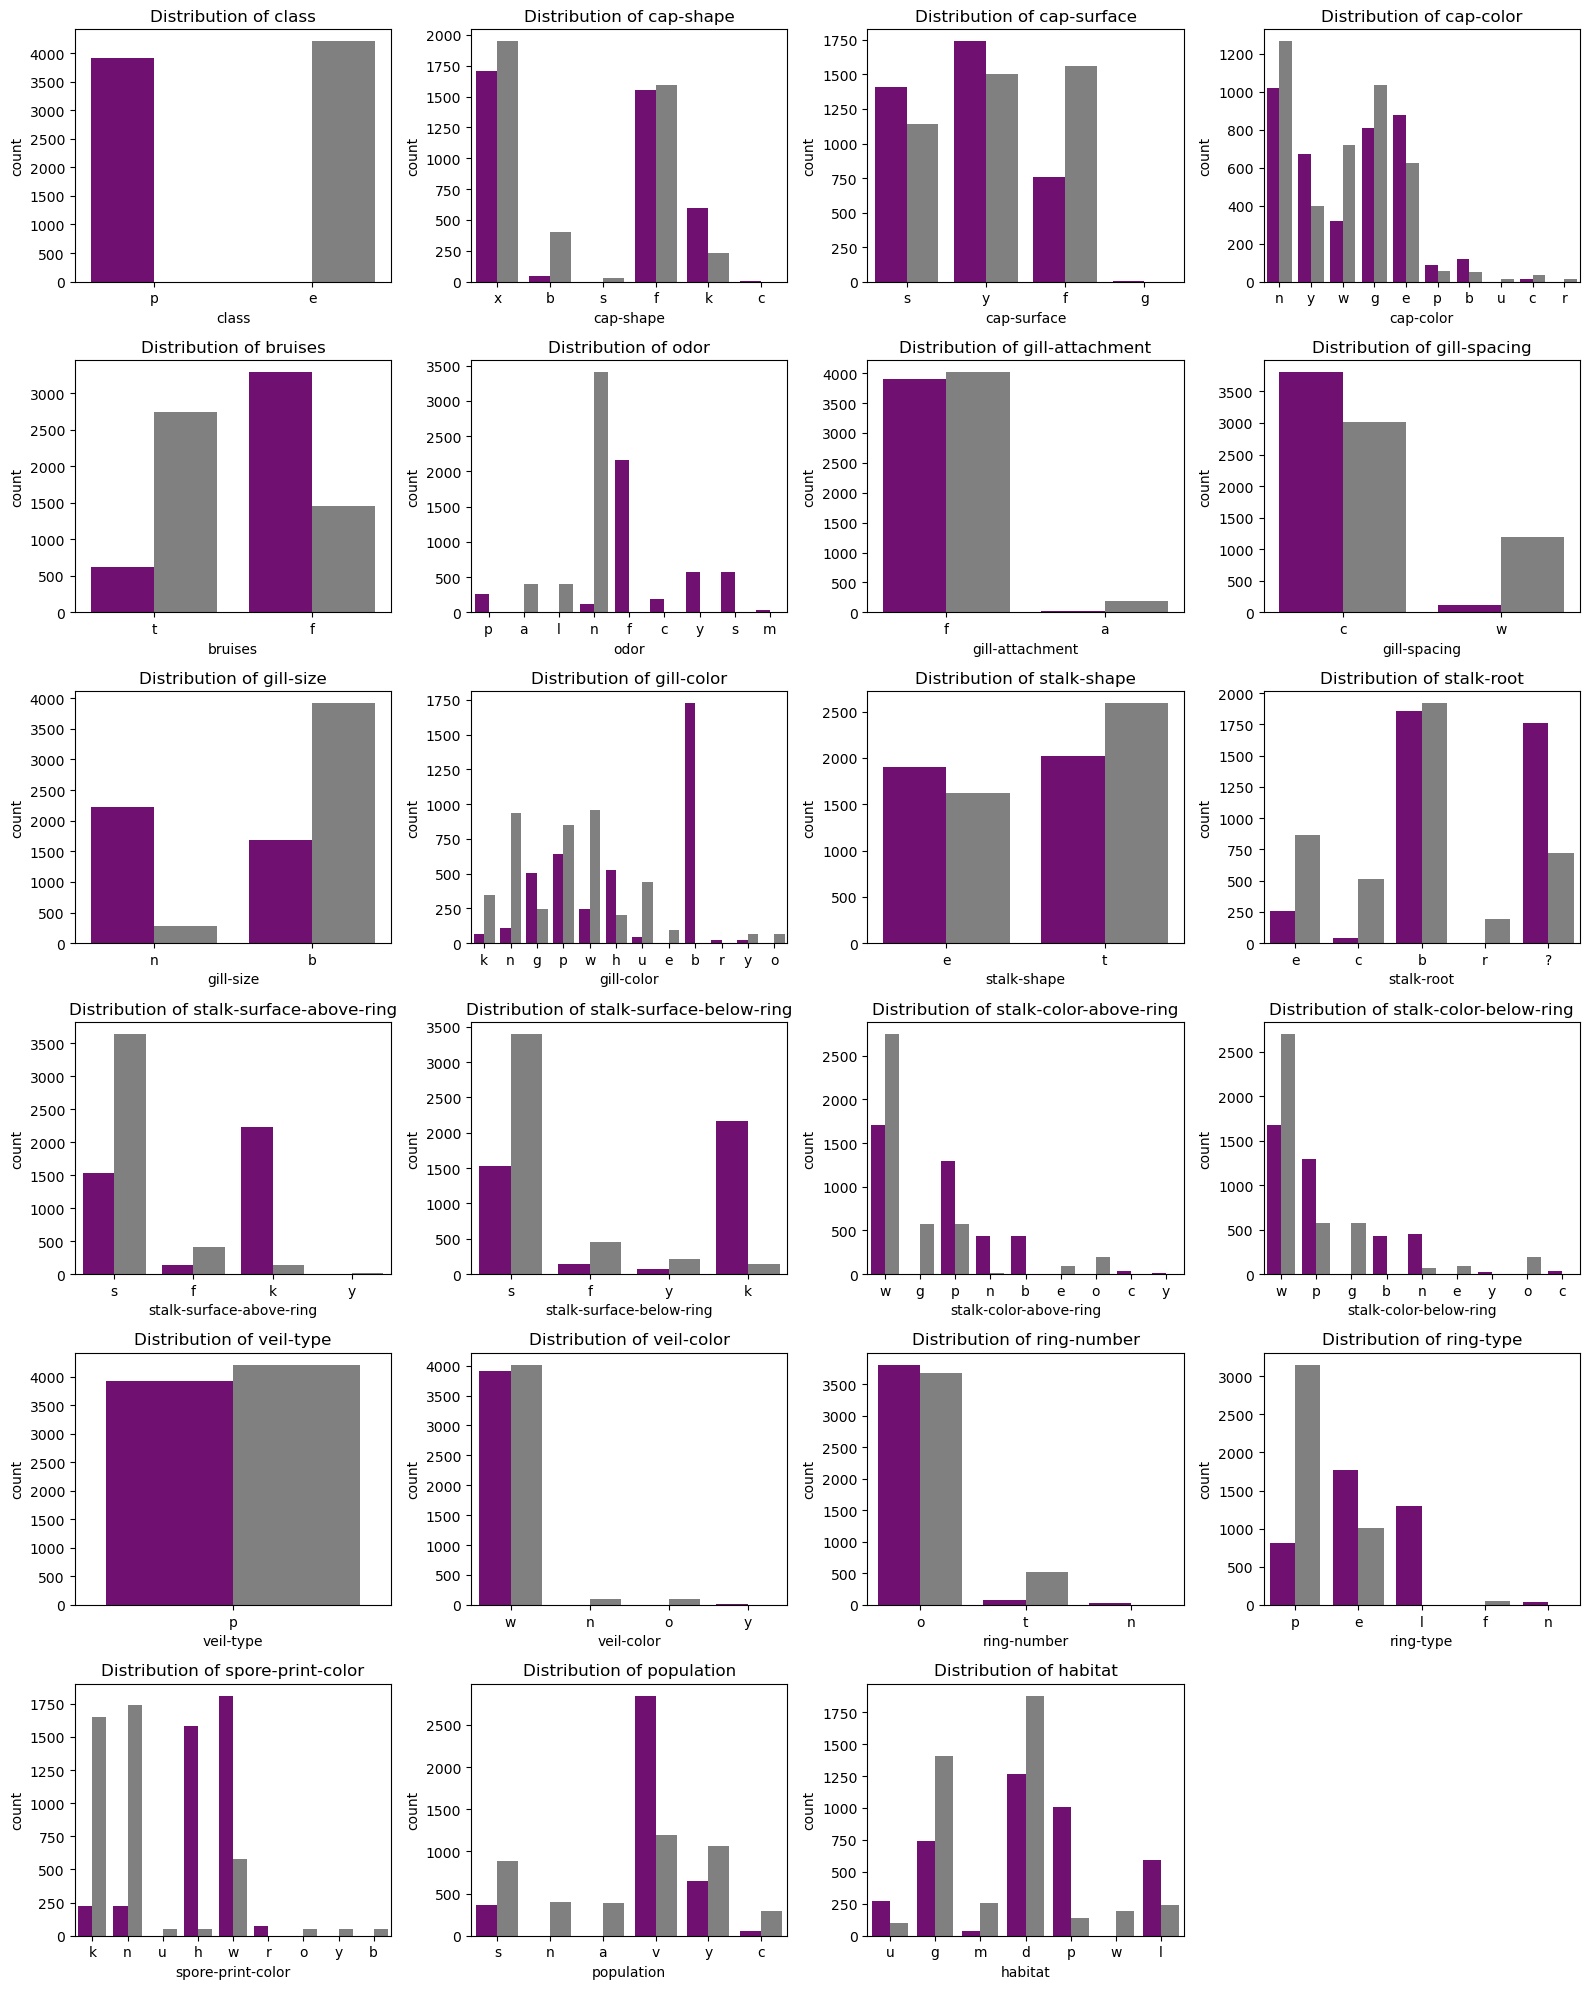

In [15]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))

for feature, ax in zip(features, axes.flatten()):    
    sns.countplot(x=feature, hue='class', data=data, ax=ax, palette=['purple', 'gray'], linewidth=0)
    ax.set_title(f"Distribution of {feature}")
    ax.get_legend().remove()

# Remove any unused subplots
for remaining_ax in axes.flatten()[len(features):]:
    remaining_ax.remove()

plt.tight_layout()
plt.show()

В столбце veil-type все значения одинаковые, так что можно его удалить

In [16]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [17]:
data.drop('veil-type', inplace = True, axis=1)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


Целевой переменной является class, остальные можно считать факторными. Так как факторных переменных очень много возьмем только первые пять.

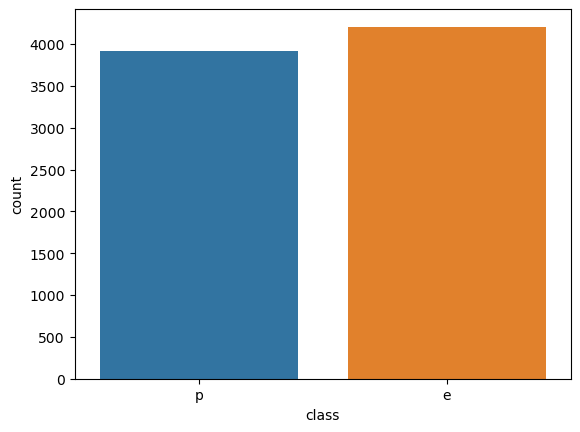

In [30]:
sns.countplot(x=data['class'], data=data);

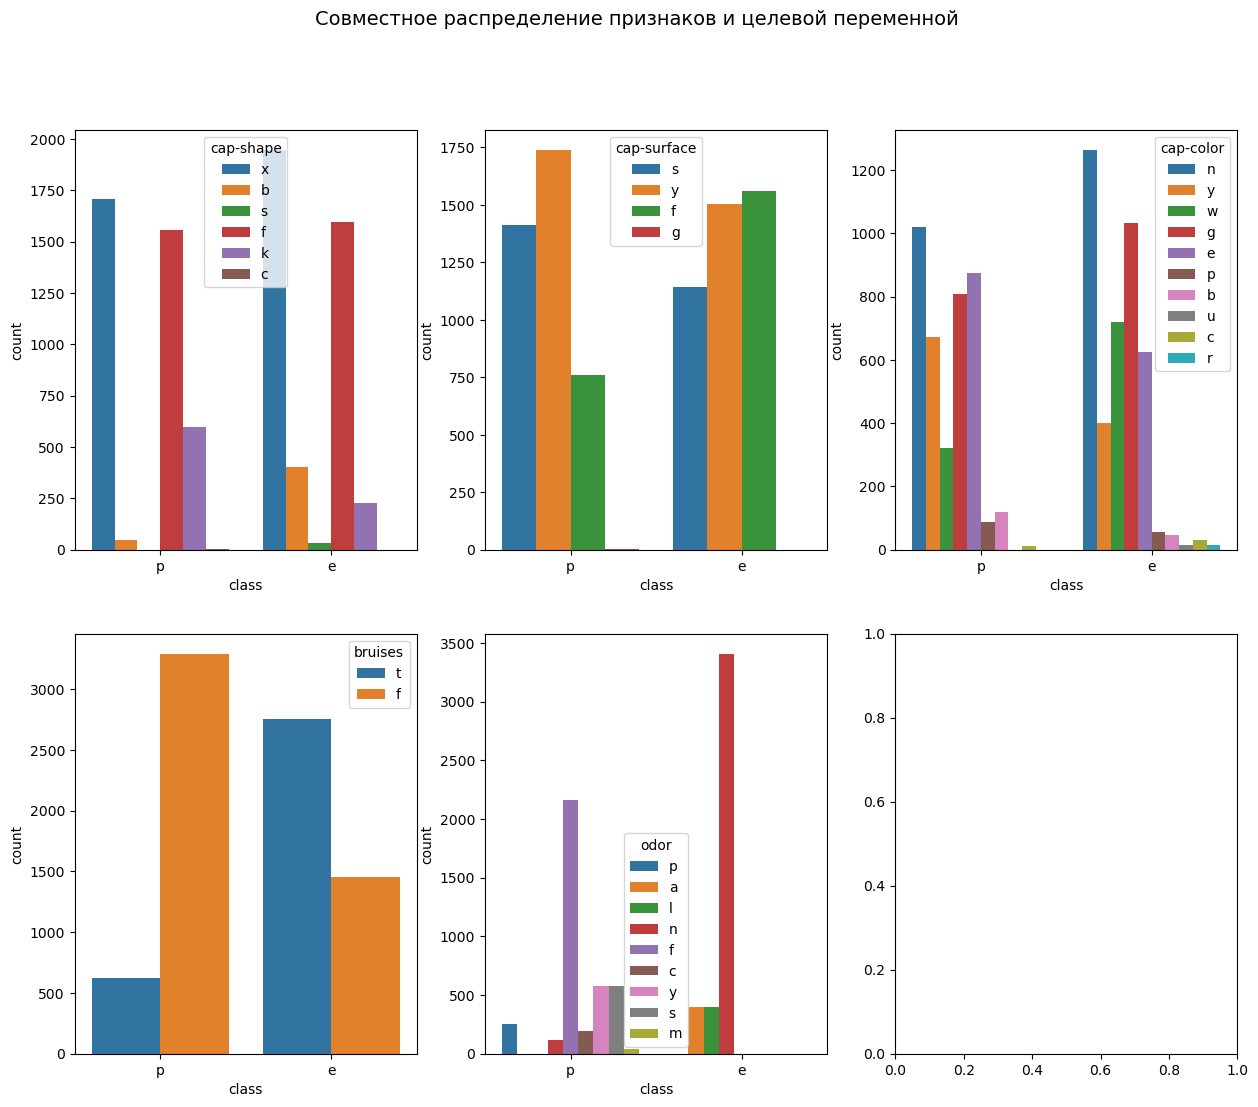

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(15,12))
axes = ax.ravel()
fig.suptitle('Cовместное распределение признаков и целевой переменной', fontsize=14)
for i, feature in enumerate(['cap-shape','cap-surface','cap-color','bruises','odor']):
    sns.countplot(x='class',data=data,  ax=axes[i],hue=feature )
#fig.subplots_adjust(hspace=0.5,wspace=0.5);
plt.show()

больше грибов являются съедобными, чем ядовитыми

отделим целевую переменную от остальных и применим к ней label encoder

In [20]:
y = data['class']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y.shape

(8124,)

к факторным применяем one hot encoding

In [37]:
x = pd.get_dummies(data.drop(['class','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
'stalk-surface-above-ring','stalk-surface-below-ring' ,'stalk-color-above-ring','stalk-color-below-ring',     
'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population','habitat'], axis=1))
x.shape

(8124, 31)

In [38]:
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


разделим данные на тестовую и обучающую

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6499, 116), (6499,), (1625, 116), (1625,))

In [26]:
results = pd.DataFrame()
Name = []
Accuracy = []

Логистическая регрессия

In [27]:
lr = LogisticRegression()
lr_pred = lr.fit(x_train, y_train).predict(x_test)
Name.append('Logistic Regression')
Accuracy.append(accuracy_score(y_test, lr_pred))
print("Accuracy score using Logistic Regression is: {}%".format(accuracy_score(y_test, lr_pred)*100))
print(classification_report(y_test, lr_pred))

Accuracy score using Logistic Regression is: 99.81538461538462%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



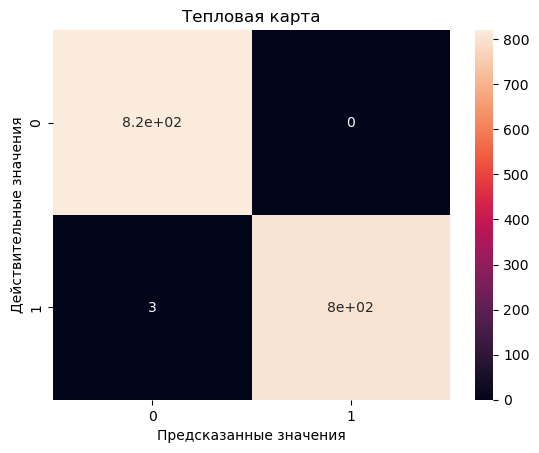

In [50]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    confusion_matrix(y_test, lr_pred)),
    annot=True, cbar=True)
plt.title('Тепловая карта')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [55]:
recall_score(y_test, lr_pred, pos_label=1)

0.9962732919254659

In [57]:
recall_score(y_test, lr_pred, pos_label=1)

0.9962732919254659

Наивный байесовский классификатор

In [58]:
gnb = GaussianNB()
gnb_pred = gnb.fit(x_train, y_train).predict(x_test)
Name.append('Naive Bayes')
Accuracy.append(accuracy_score(y_test, gnb_pred))
print("Accuracy score using Naive Bayes is: {}%".format(accuracy_score(y_test, gnb_pred)*100))
print(classification_report(y_test, gnb_pred))

Accuracy score using Naive Bayes is: 96.55384615384615%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       820
           1       0.94      1.00      0.97       805

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



Метод K ближайших соседей

In [63]:
neighbor = KNeighborsClassifier(weights='distance')
neighbor.fit(x_test, y_test)
knn_pred = neighbor.predict(x_test)
matrix = confusion_matrix(y_test, knn_pred)
matrix

array([[820,   0],
       [  0, 805]], dtype=int64)

In [64]:
print("Accuracy score using K-Nearest Neighbor is: {}%".format(accuracy_score(y_test, knn_pred)*100))
print(classification_report(y_test, knn_pred))

Accuracy score using K-Nearest Neighbor is: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Метод опорных векторов

In [67]:
svc = SVC(kernel='linear')
svc_pred = svc.fit(x_train, y_train).predict(x_test)
Name.append('Support Vectors Classifier')
Accuracy.append(accuracy_score(y_test, svc_pred))
print("Accuracy score using Support Vectors Classifier is: {}%".format(accuracy_score(y_test, svc_pred)*100))
print(classification_report(y_test, svc_pred))

Accuracy score using Support Vectors Classifier is: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Дерево решений

In [68]:
dst = DecisionTreeClassifier()
dst_pred = dst.fit(x_train, y_train).predict(x_test)
Name.append('Decision Trees')
Accuracy.append(accuracy_score(y_test, dst_pred))
print("Accuracy score using Decision Trees is: {}%".format(accuracy_score(y_test, dst_pred)*100))
print(classification_report(y_test, dst_pred))

Accuracy score using Decision Trees is: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [69]:
results['Name'] = Name
results['Accuracy'] = Accuracy
results

,Name,Accuracy
0,Logistic Regression,0.998154
1,Naive Bayes,0.965538
2,K-Nearest Neighbor,1.000000
3,Support Vectors Classifier,1.000000
4,Decision Trees,1.000000
